# PARTE 1- Clase (1 y2)

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import array_to_latex, plot_state_qsphere
from qiskit.quantum_info import Statevector 
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer
import numpy as np
from qiskit.quantum_info.operators import Operator

## Ejercicio 1

$$|+\rangle|+\rangle|-\rangle= \frac{1}{\sqrt{8}}
\left(\vert0\rangle + \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + \vert1\rangle\right) 
\otimes
\left(\vert0\rangle - \vert1\rangle\right) $$

caso general de producto tensorial de 2 qubits.
$$
    (\alpha\ket{0}+\beta\ket{1})\otimes(\alpha^{\prime}\ket{0}+\beta^{\prime}\ket{1})= \alpha\alpha^{\prime}\ket{00}+\alpha\beta^{\prime}\ket{01}+\beta\alpha^{\prime}\ket{10}+\beta\beta^{\prime}\ket{11}
$$
$$
|+\rangle= \frac{1}{\sqrt{2}}
\left(\vert0\rangle + \vert1\rangle\right) 
$$

$$
|-\rangle= \frac{1}{\sqrt{2}}
\left(\vert0\rangle - \vert1\rangle\right) 
$$

$$
={\frac{\sqrt{2}}{4}}\ket{000}-{\frac{\sqrt{2}}{4}}\ket{001}+{\frac{\sqrt{2}}{4}}\ket{010}-{\frac{\sqrt{2}}{4}}\ket{011}+{\frac{\sqrt{2}}{4}}\ket{100}-{\frac{\sqrt{2}}{4}}\ket{101}+{\frac{\sqrt{2}}{4}}\ket{110}-{\frac{\sqrt{2}}{4}}\ket{111}
$$

La medición para el qubit central en el caso de que sea 1 es :
$$
(4(\frac{\sqrt{2}}{4})^2) = 0.5
$$
La medición para el qubit central en el caso de que sea 0 es :
$$
(4(\frac{\sqrt{2}}{4})^2)=0.5
$$

In [3]:
op_ket_1 = Operator([[1/np.sqrt(2)], [1/np.sqrt(2)]])
op_ket_2 = Operator([[1/np.sqrt(2)], [-1/np.sqrt(2)]])
ket_system = Statevector(op_ket_1.tensor(op_ket_1).tensor(op_ket_2))
ket_system.draw('Latex')

<IPython.core.display.Latex object>

In [4]:
probs_ket_system = ket_system.probabilities_dict([1])
print('probs: {}'.format(probs_ket_system ))

probs: {'0': 0.4999999999999998, '1': 0.4999999999999998}


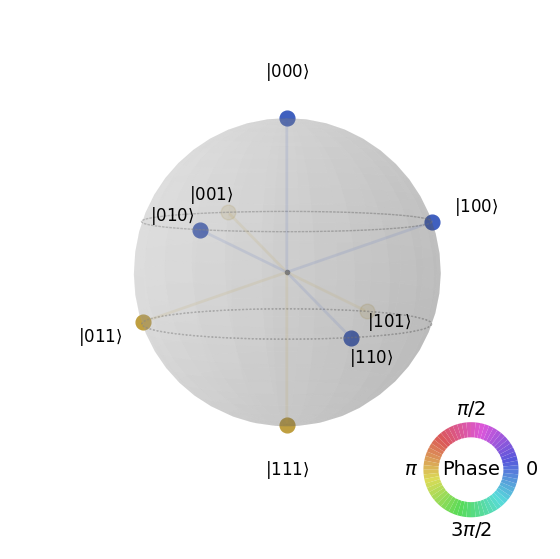

In [6]:
plot_state_qsphere(ket_system)

## Ejercicio 2

In [ ]:
#ketprueba = Statevector([0,0,1/np.sqrt(2),0,0,1/np.sqrt(2),0,0])
#ketprueba.draw('Latex')

In [ ]:
# plot_state_qsphere(ketprueba)

In [9]:
ketprueba2 = Statevector([0,0,1/np.sqrt(2),0,0,0,0,0,0,0,0,0,0,1/np.sqrt(2),0,0])
ketprueba2.draw('Latex')

<IPython.core.display.Latex object>

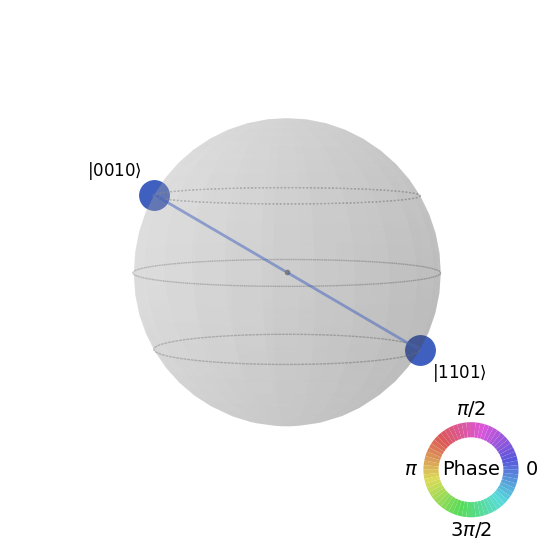

In [10]:
plot_state_qsphere(ketprueba2)

RESPUESTA : Por la geometría de la esfera con tres paralelas y contando como los estados ${\ket{0000} y \ket{1111}}$ a los polos, la cantidad de qubits en el estado es 4.

## Ejercicio 3

$$ U3(\theta, \phi, \lambda) =  \begin{pmatrix} \cos(\frac{\theta}{2})  & - e^{i\lambda}\sin(\frac{\theta}{2})\\
 e^{i\phi}\sin(\frac{\theta}{2})  &  e^{i(\phi + \lambda)}\cos(\frac{\theta}{2})
\end{pmatrix}$$

$\theta = \pi, \phi = \frac{\pi}{2} $ y $ \lambda = \frac{7\pi}{2}$

$$ U3(\theta, \phi, \lambda) =  \begin{pmatrix} \cos(90^0)  & - e^{i\frac{7\pi}{2}}\sin(90^0)\\
 e^{i\frac{\pi}{2}}\sin(90^0)  &  e^{i( \frac{\pi}{2} + \frac{7\pi}{2})}\cos(90^0)
\end{pmatrix}$$

$$ U3(\theta, \phi, \lambda) =  \begin{pmatrix} 0  & - e^{i\frac{7\pi}{2}}\\
 e^{i\frac{\pi}{2}} &  0
\end{pmatrix}$$

$$ U3(\theta, \phi, \lambda) =  \begin{pmatrix} 0  & i\\
 i&  0
\end{pmatrix}$$

RESPUESTA: 
$$ U3 = i(| 0 \rangle \langle 1| + | 1 \rangle \langle 0 |)$$

In [11]:
Operador_1 = Operator([[0, 1j],[1j, 0]])
array_to_latex(Operador_1)

<IPython.core.display.Latex object>

# PARTE 2- Clase (4 y 5 )

## Ejercicio 4

$$\begin{align}
\sum_{i=1}^n x_iz_i \pmod 2=x_1z_1\oplus x_2z_2\oplus\cdots\oplus x_nz_n
\end{align}$$

Sabemos que la operación XOR tiene la siguiente tabla de verdad 
$$
\begin{array}{cc|c} 
y& w& y\oplus w\\ 
\hline
0& 0 & 0 \\ 
0& 1 & 1 \\ 
1& 0 & 1 \\ 
1& 1 & 0 \\ 
 \end{array}
$$

Que se puede usar como una suma binaria, sin acarreamiento
$$0+0=0|0$$
$$0+1=0|1$$
$$1+0=0|1$$
$$1+1=1|0$$


Una sumatoria en binaria es de la forma 
$$\sum_{i=1}^2 x_i = *|...*|*|*|(x_1\oplus x_2 \oplus x_3\oplus... \oplus x_n)|$$

donde las separaciones entre barras representan un dígito binario.

El producto 
$$x_iz_i = \{0,1\}$$

$$\begin{align}
\sum_{i=1}^n x_iz_i =*|...*|*|*|(x_1\oplus x_2 \oplus x_3\oplus... \oplus x_n)|
\end{align}$$
El módulo dos es equivalente al resto de la suma luego de dividirlo entre 2, esto es lo mismo que el último dígito de la suma binaria, es decir :

$$\begin{align}
\sum_{i=1}^n x_iz_i \pmod 2=x_1z_1\oplus x_2z_2\oplus\cdots\oplus x_nz_n
\end{align}$$

## Ejercicio 5

Algoritmo_de_Deutsch_Jozsa - Esta compilado en el archivo con el mismo nombre 

In [ ]:


from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit import execute , Aer
import numpy as np

In [ ]:
oraculo_b = QuantumCircuit(4)


oraculo_b.barrier()

for x in range(2):
    oraculo_b.cx(x,3)

oraculo_b.barrier()

oraculo_b.barrier()

oraculo_b.draw()

In [ ]:
qcc=QuantumCircuit(4,3)
qcc.x(3)
qcc.h(3)
qcc.barrier()

for x in range(3):
    qcc.h(x)
qcc.barrier()

qcc=qcc.compose(oraculo_b)
qcc.barrier

for x in range(3):
    qcc.h(x)
qcc.barrier()

qcc.measure([0,1,2],[0,1,2])
qcc.draw()

In [ ]:
aer_si = Aer.get_backend('aer_simulator')
result = aer_si.run(qcc).result()
answe = result.get_counts()

plot_histogram(answe)

## Ejercicio 6
 En la construcción más simple posible de un oráculo balanceado, se utiliza la compuerta  𝐶𝑋
 , la cual toma como objetivo el  (𝑛+1)
 -ésimo qubit del circuito y como control cada uno de los  𝑛
  primeros qubits. Sin embargo, ¿es realmente necesario aplicar  𝐶𝑋
  a todos los  𝑛
  primeros qubits, o podríamos prescindir de algunos y obtener igualmente un oráculo balanceado?

Para generar un circuito balanceado basta con que se cumpla una relación simétrica, no es necesario que todos los qubits interactúen, como en el ejemplo anterior, en donde la lógica puede reducir las operaciones entre qubits.

RESPUESTA: No, el ejercicio anterior lo demuestra.

## Ejercicio 7
Algoritmo_de_Grover - Esta compilado en el arhivo con el mismo nombre 


In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import XGate,ZGate
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer

In [ ]:
def oracle_part(qc,qr):
    mcx = XGate().control(3)
    
    #Los qubits del 0 al 4 son los nodos.
    #Los qubits del 5 al 10 nos permiten reconocer si la arista es correcta
    #(i.e. si se da entre nodos de distinto color).
    qc.cx(qr[0], qr[5])
    qc.cx(qr[3], qr[5])
    qc.barrier()
    qc.cx(qr[0], qr[6])
    qc.cx(qr[4], qr[6])
    qc.barrier()
    qc.cx(qr[1], qr[7])
    qc.cx(qr[3], qr[7])
    qc.barrier()
    qc.cx(qr[1], qr[8])
    qc.cx(qr[4], qr[8])
    qc.barrier()
    qc.cx(qr[2], qr[9])
    qc.cx(qr[3], qr[9])
    qc.barrier()
    qc.cx(qr[2], qr[10])
    qc.cx(qr[4], qr[10])
    qc.barrier()
    
    
    #Los qubits del 11 al 13 nos van a permitir contar la cantidad de aristas correctas
    #de tal forma que la suma será expresada en binario con cifras dadas por q_11, q_10 y q_9.
    qc.barrier()    
    qc.cx(qr[5],qr[11])
    qc.barrier()
    
    qc.ccx(qr[6], qr[11], qr[12])
    qc.cx(qr[6],qr[11])
    qc.barrier()
    
    qc.ccx(qr[7], qr[11], qr[12])
    qc.cx(qr[7],qr[11])
    qc.barrier()
    
    qc.append(mcx,[8,11,12,13])
    qc.ccx(qr[8], qr[11], qr[12])
    qc.cx(qr[8],qr[11])
    qc.barrier()
    
    qc.append(mcx,[9,11,12,13])
    qc.ccx(qr[9], qr[11], qr[12])
    qc.cx(qr[9],qr[11])
    qc.barrier()

    qc.append(mcx,[10,11,12,13])
    qc.ccx(qr[10], qr[11], qr[12])
    qc.cx(qr[10],qr[11])
    qc.barrier()
    
    qc.x(qr[11])

    qc.barrier()
    
    #El qubit 14 indicará cuando se haya encontrado un estado deseado
    qc.append(mcx,[11,12,13,14])
    
    return qc

In [ ]:
qr=QuantumRegister(15)
qc=QuantumCircuit(qr)
oracle_part(qc,qr).draw()

In [ ]:
def oracle(qc,qr):
    
    qc=oracle_part(qc,qr)#Compone el circuito con el circuito inverso
    qc1=qc.inverse()
    qc.z(14)#efecto global (-) marcador del estado deseado
    qc.compose(qc1,inplace=True)
    
    return qc

In [ ]:
qr=QuantumRegister(15)
qc=QuantumCircuit(qr)
oracle(qc,qr).draw()

In [ ]:
def grover_diffusion(qc,qr):
    mcz = ZGate().control(4)#   Cual es el significado
    
    qc.barrier()
    qc.h(range(5))
    qc.x(range(5))
    qc.append(mcz,list(range(0,5)))# Para que se usa
    qc.x(range(5))
    qc.h(range(5))
    qc.barrier()
    return qc

In [ ]:
qr=QuantumRegister(15)
qc=QuantumCircuit(qr)
grover_diffusion(qc,qr).draw()

In [ ]:
 grover(qc,qr):
    return grover_diffusion(oracle(qc,qr),qr)

In [ ]:
qr=QuantumRegister(15)
qc=QuantumCircuit(qr)
grover(qc,qr).draw()

In [ ]:
qr=QuantumRegister(15)
qc=QuantumCircuit(qr)

qra=QuantumRegister(15)
cra=ClassicalRegister(5)
qa=QuantumCircuit(qra,cra)

qa.h(range(4))
qb=grover(qc,qr)
qa.compose(qb.compose(qb),inplace=True)

qa.measure(range(5),cra)

qa.draw()

In [ ]:
qasm_simulator = Aer.get_backend('qasm_simulator')

job = execute(qa, qasm_simulator, shots = 1000)
counts = job.result().get_counts(qa)

plot_histogram(counts)

## Ejercicio 8

\begin{align}
k\approx\frac{\pi}{4}\sqrt{\frac{2^n}{a}}
\end{align}

$$k \approx \frac{\pi}{4} \sqrt{\frac{2^5}{4}} = \frac{\pi\sqrt{2}}{2} $$ 

In [ ]:
k = np.pi*np.sqrt(2)/2
print(k)

2.221441469079183


Respuesta :  Aproximadamente 2 veces

## Ejecicio extra


Si
$$
\begin{align*}
\ket{\psi3}&=U\omega\ket{\psi_2}\
&=\left(2\ket{s}\bra{s}-\mathbb{I}\right)\left(-\sqrt{\frac{a}{2^n}}\ket{A}+\sqrt{\frac{b}{2^n}}\ket{B}\right)
\end{align*}$$

Usando

$$
\begin{align*}
\ket{s}\bra{s}=\frac{a}{2^n}\ket{A}\bra{A}+\frac{b}{2^n}\ket{B}\bra{B}+\frac{\sqrt{ab}}{2^n}\left[\ket{A}\bra{B}+\ket{B}\bra{A}\right]
\end{align*}
$$

$$
\begin{align*}
&\sin\theta=\sqrt{\frac{a}{2^n}}\
&\cos\theta=\sqrt{\frac{b}{2^n}}
\end{align*}
$$

Demuestre:
$$

\begin{align*}
\ket{\psi_3}=\sin 3\theta\ket{A}+\cos 3\theta\ket{B}
\end{align*}$$

Resolución:
$$
\begin{align*}
\ket{\psi3}&=U\omega\ket{\psi_2}\
&=\left(2\ket{s}\bra{s}-\mathbb{I}\right)\left(-\sin(\theta)\ket{A}+\cos(\theta)\ket{B}\right)
\end{align*}
$$


$$
\ket{\psi3}=-2\sin(\theta)\ket{s}\bra{s}\ket{A}+ 2\cos(\theta)\ket{s}\bra{s}\ket{B}+\sin(\theta)\ket{A}-\cos(\theta)\ket{B}
$$
Separamos la ecuación


### 1ra-prt
$$
-2\sin(\theta)\ket{s}\bra{s}\ket{A}=-2\sin(\theta)\{\sin(\theta)^2\ket{A}\bra{A}\ket{A} + \cos(\theta)^2\ket{B}\bra{B}\ket{A} + \sin(\theta)\cos(\theta)\{\ket{A}\bra{B}\ket{A} + \ket{B}\bra{A}\ket{A}\}\}
$$


Ortogonalidad y normalidad


$$
=-2\sin(\theta)\{\sin(\theta)^2\ket{A} +\sin(\theta)\cos(\theta)+\ket{B}  \}
$$

### 2da-prt
$$
2\cos(\theta)\ket{s}\bra{s}\ket{B}=2\cos(\theta)\{\sin(\theta)^2\ket{A}\bra{A}\ket{B} + \cos(\theta)^2\ket{B}\bra{B}\ket{B} + \sin(\theta)\cos(\theta)\{\ket{A}\bra{B}\ket{B} + \ket{B}\bra{A}\ket{B}\}\}
$$


Ortogonalidad y normalidad


$$
= 2\cos(\theta)\{ \cos(\theta)^2\ket{B} + \sin(\theta)\cos(\theta)\ket{A}\}
$$
### 3ra -prt 

$$
\sin(\theta)\ket{A}-\cos(\theta)\ket{B}
$$


Entonces

$$
\ket{\psi3} = -2\sin(\theta)\{\sin(\theta)^2\ket{A} +\sin(\theta)\cos(\theta)+\ket{B}  \} + 2\cos(\theta)\{ \cos(\theta)^2\ket{B} + \sin(\theta)\cos(\theta)\ket{A}\} + \sin(\theta)\ket{A}-\cos(\theta)\ket{B}
$$


$$
\ket{\psi3} = (2\sin(\theta)\cos(\theta)^2+\sin(\theta)-2\sin(\theta)^3)\ket{A} + (-2\sin(\theta)^2\cos(\theta)- \cos(\theta)+2\cos(\theta))\ket{B}
$$
$$
\ket{\psi3} = (2\sin(\theta)\cos(\theta)^2+(1-2\sin(\theta)^2)\sin(\theta))\ket{A} + (-2\sin(\theta)^2\cos(\theta)- (2\cos(\theta)^2-1)\cos(\theta))\ket{B}
$$
$$
\ket{\psi3} = (\sin(2\theta)\cos(\theta)+\cos(2\theta)\sin(\theta))\ket{A} + (-\sin(2\theta)\sin(\theta)+ \cos(2\theta)\cos(\theta))\ket{B}
$$
$$
\ket{\psi3} = \sin(3\theta)\ket{A} + \cos(3\theta)\ket{B}
$$

# Parte 3 - Clase 6

## Ejercicio 9

9.- Encontrar el estado $|a\rangle$ tal que $\text{QFT}^{\dagger}|a\rangle = |100\rangle$.


El operador  $$\text{QFT}^{\dagger}|a\rangle $$  es la transpuesta conjugada de el operador QFT(Transformada Cuántica de Fourier), es la transformada inversa
$$QFT|100 \rangle = QFT|4 \rangle  $$


$n = 3$
$N = 2^n = 8$

$$QFT|x\rangle=   \frac{1}{\sqrt{N}}
\left(\vert0\rangle + e^{\frac{2\pi i}{2}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^2}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^{3}}x} \vert1\rangle\right) 
$$

$$QFT|4\rangle=   \frac{1}{\sqrt{8}}
\left(\vert0\rangle + e^{\frac{2\pi i}{2}4} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^2}4} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^{3}}4} \vert1\rangle\right) $$

$$QFT|4\rangle= \frac{1}{\sqrt{8}}
\left(\vert0\rangle + \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + \vert1\rangle\right) 
\otimes
\left(\vert0\rangle - \vert1\rangle\right) $$

Curiosamente es el mismo producto que el del  ejercicio (1)

In [ ]:
ket_system.draw('Latex')

<IPython.core.display.Latex object>

## Ejercicio 10

Encuentra el estado $|b\rangle$ tal que $\text{QFT}^{\dagger}|b\rangle = |011\rangle$.

$$QFT|3\rangle=   \frac{1}{\sqrt{8}}
\left(\vert0\rangle + e^{\frac{2\pi i}{2}3} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^2}3} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^{3}}3} \vert1\rangle\right) $$

$$QFT|3\rangle= \frac{1}{\sqrt{8}}
\left(\vert0\rangle + \vert1\rangle\right) 
\otimes
\left(\vert0\rangle -i \vert1\rangle\right) 
\otimes
\left(\vert0\rangle +(-\frac{\sqrt{2}}{2} + i \frac{\sqrt{2}}{2}) \vert1\rangle\right)$$ 

In [18]:

op_ket_3 = Operator([[1/np.sqrt(2)], [-1j/np.sqrt(2)]])
op_ket_4 = Operator([[1/np.sqrt(2)], [-1*(np.sqrt(2)/2 + (np.sqrt(2)*1j)/2) /np.sqrt(2)]])
ket_system2 = Statevector(op_ket_2.tensor(op_ket_3).tensor(op_ket_4))
ket_system2.draw('Latex')

<IPython.core.display.Latex object>

## Algoritmo_de_Fourier
Algoritmo_de_Fourier - Esta compilado en el archivo con el mismo nombre 

In [ ]:
import numpy as np
from numpy import pi
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import execute

In [ ]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # Al final de nuestra función, llamamos a la misma función de nuevo en
    # los siguientes qubits (reducimos n en uno antes en la función)
    qft_rotations(circuit, n)


In [ ]:
# El estado de entrada 
qc = QuantumCircuit(3)

# Codificando en el circuito el estado |100>
#qc.x(0)
qc.x(2)
qc.draw()

In [ ]:
qft(qc,3)
qc.draw()

In [ ]:
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

In [ ]:
qc.measure_all()
qc.draw()

In [ ]:
qasm_simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, qasm_simulator, shots = 1000)
counts = job.result().get_counts(qc)
plot_histogram(counts)